In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv("office-coffeeshop-days.csv")
df

,is_weekend,hour,destination
0,0,7,coffeeshop
1,0,8,office
2,0,9,office
3,0,6,office
4,1,10,office
5,1,8,coffeeshop
6,1,9,office
7,1,7,office
8,0,7,coffeeshop
9,0,8,office


In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape

(8, 2)

In [19]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(x_train, y_train)
y_pred = clf_random_forest.predict(x_test)

In [20]:
x_test

array([[ 1, 10],
       [ 0,  8],
       [ 0,  9]])

In [21]:
y_test

array(['office', 'office', 'office'], dtype=object)

In [22]:
y_pred

array(['office', 'office', 'office'], dtype=object)

In [23]:
accuracy_score(y_test, y_pred)

1.0

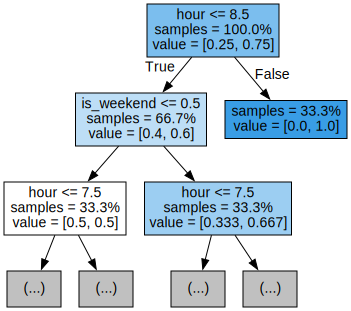

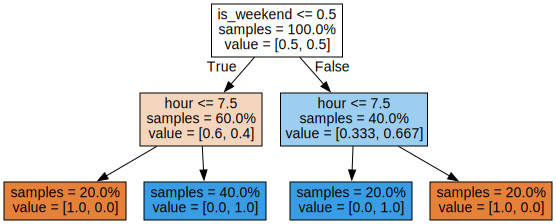

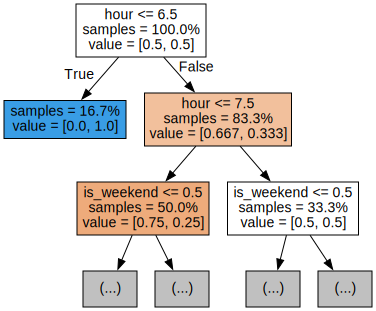

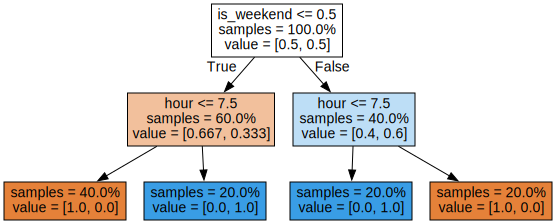

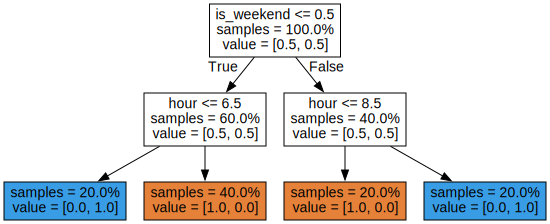

In [24]:
from sklearn.tree import export_graphviz
import graphviz

for i in range(5):
    tree = clf_random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df.iloc[:,:-1].columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)